**CUSTOMER PURCHASE BEHAVIOR ANALYSIS**

**Context**

“I’m a data analyst, and the Chief Marketing Officer has told me that previous marketing campaigns have not been as effective as they were expected to be. I need to analyze the data set to understand customer behavior and propose data-driven solutions.”

**Objective**

Analyze the provided dataset containing customer information and purchasing behavior to make informed decisions to identify patterns, trends, and correlations that will help to understand customer needs better and reach the right customer with right messaging.

**About the Dataset**

Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
2. ID - Unique ID of each customer
3. Year_Birth - Age of the customer
4. Complain - 1 if the customer complained in the last 2 years
5. Dt_Customer - date of customer's enrollment with the company
6. Education - customer's level of education
7. Marital - customer's marital status
8. Kidhome - number of small children in customer's household
9. Teenhome - number of teenagers in customer's household
10. Income - customer's yearly household income
11. MntFishProducts - the amount spent on fish products in the last 2 years
12. MntMeatProducts - the amount spent on meat products in the last 2 years
13. MntFruits - the amount spent on fruits products in the last 2 years
14. MntSweetProducts - amount spent on sweet products in the last 2 years
15. MntWines - the amount spent on wine products in the last 2 years
16. MntGoldProds - the amount spent on gold products in the last 2 years
17. NumDealsPurchases - number of purchases made with discount
18. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
19. NumStorePurchases - number of purchases made directly in stores
20. NumWebPurchases - number of purchases made through the company's website
21. NumWebVisitsMonth - number of visits to company's website in the last month
22. Recency - number of days since the last purchase

**Task 1 - Data Validation**
- Clean and preprocess the dataset (handling missing values, data types, etc.).

**Import necessary libraries**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load data and accessing data**

In [34]:
data = pd.read_csv("superstore_data.csv")
data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [36]:
summary_stats = data.describe()
summary_stats

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [37]:
len(data[data.duplicated()])

0

**Issue Encounter**
- The "Income" column has 24 missing values
- Dt_Customer's type is string

**Data Cleaning**

The "Income" column has 24 missing values

In [38]:
missing_values = data.isnull().sum()
missing_values

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [39]:
mean_income = data['Income'].mean()
data['Income'].fillna(mean_income, inplace = True)

In [40]:
data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


Dt_Customer's type is string

In [41]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

Extract year of enrolling company of customer

In [42]:
data['Dt_Customer'] = data['Dt_Customer'].astype(str).str[:4]

**Add Column**

In [43]:
data['Total_Purchases'] = (data['NumCatalogPurchases'] + data['NumDealsPurchases'] 
                        + data['NumStorePurchases'] + data['NumWebPurchases'])
data['Total_Amount_Spent'] = (data['MntSweetProducts'] + data['MntFishProducts'] + data['MntFruits'] + 
                            data['MntGoldProds'] + data['MntMeatProducts'] + data['MntWines'])

**Transform new feature: In_Relationship**

In [60]:
def get_relationship(row):
    if row['Marital_Status'] == 'Married':
        return 1
    elif row['Marital_Status'] == 'Together':
        return 1
    else:
        return 0
data['In_Relationship'] = data.apply(get_relationship, axis=1)
data.head() 

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Purchases,Total_Amount_Spent,In_Relationship
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014,0,189,...,1,4,4,6,1,1,0,15,1190,0
1,1,1961,Graduation,Single,57091.0,0,0,2014,0,464,...,1,7,3,7,5,1,0,18,577,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014,0,134,...,1,3,2,5,2,0,0,11,251,1
3,1386,1967,Graduation,Together,32474.0,1,1,2014,0,10,...,1,1,0,2,7,0,0,4,11,1
4,5371,1989,Graduation,Single,21474.0,1,0,2014,0,6,...,2,3,1,2,7,1,0,8,91,0


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Task 2: Exploratory Data Analysis**

**Identify Outliers**

Object features

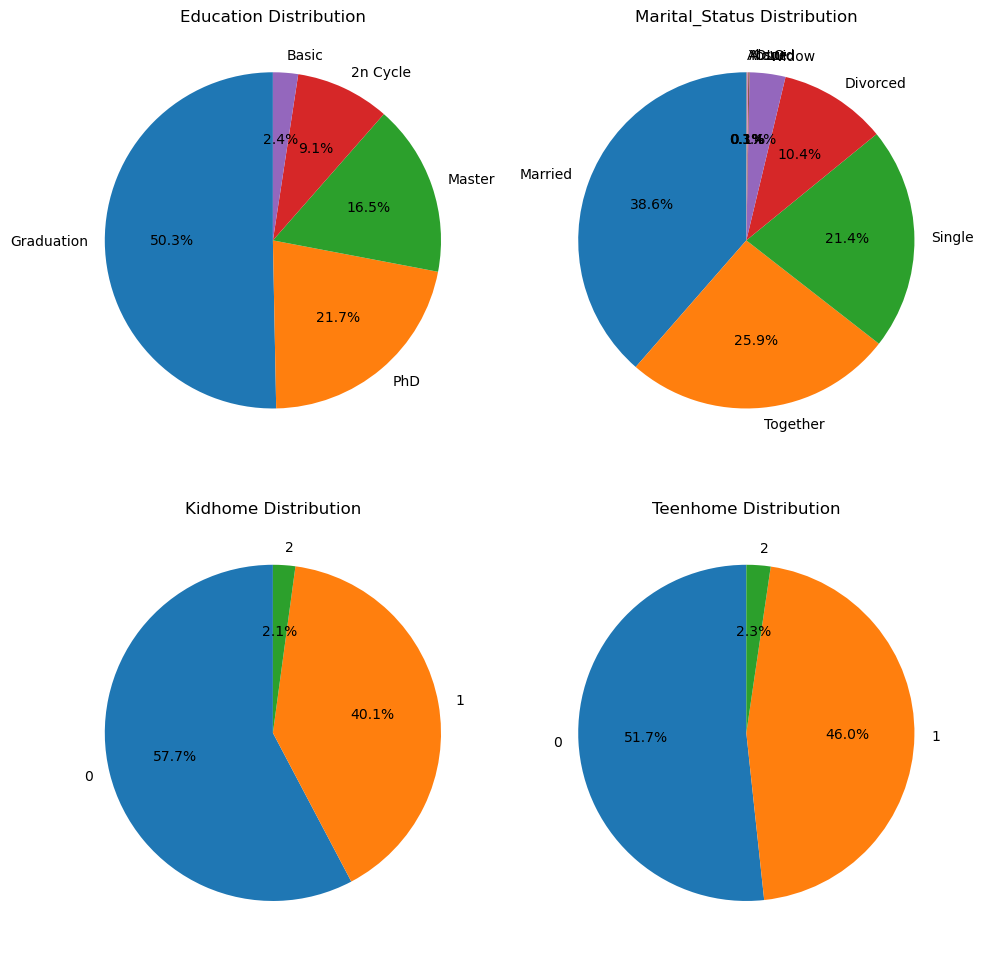

In [45]:
cat_vars = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome',]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        cat_counts = data[var].value_counts()
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs.flat[i].set_title(f'{var} Distribution')
fig.tight_layout()
plt.show()

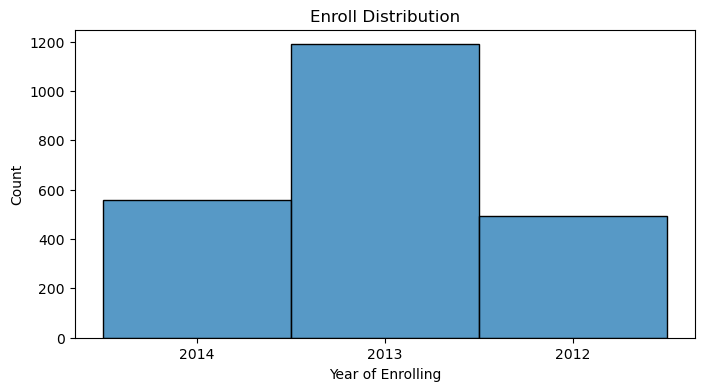

In [46]:
plt.figure(figsize=(8, 4))
sns.histplot(data['Dt_Customer'])
plt.title('Enroll Distribution')
plt.xlabel('Year of Enrolling')
plt.show()

Numerical features

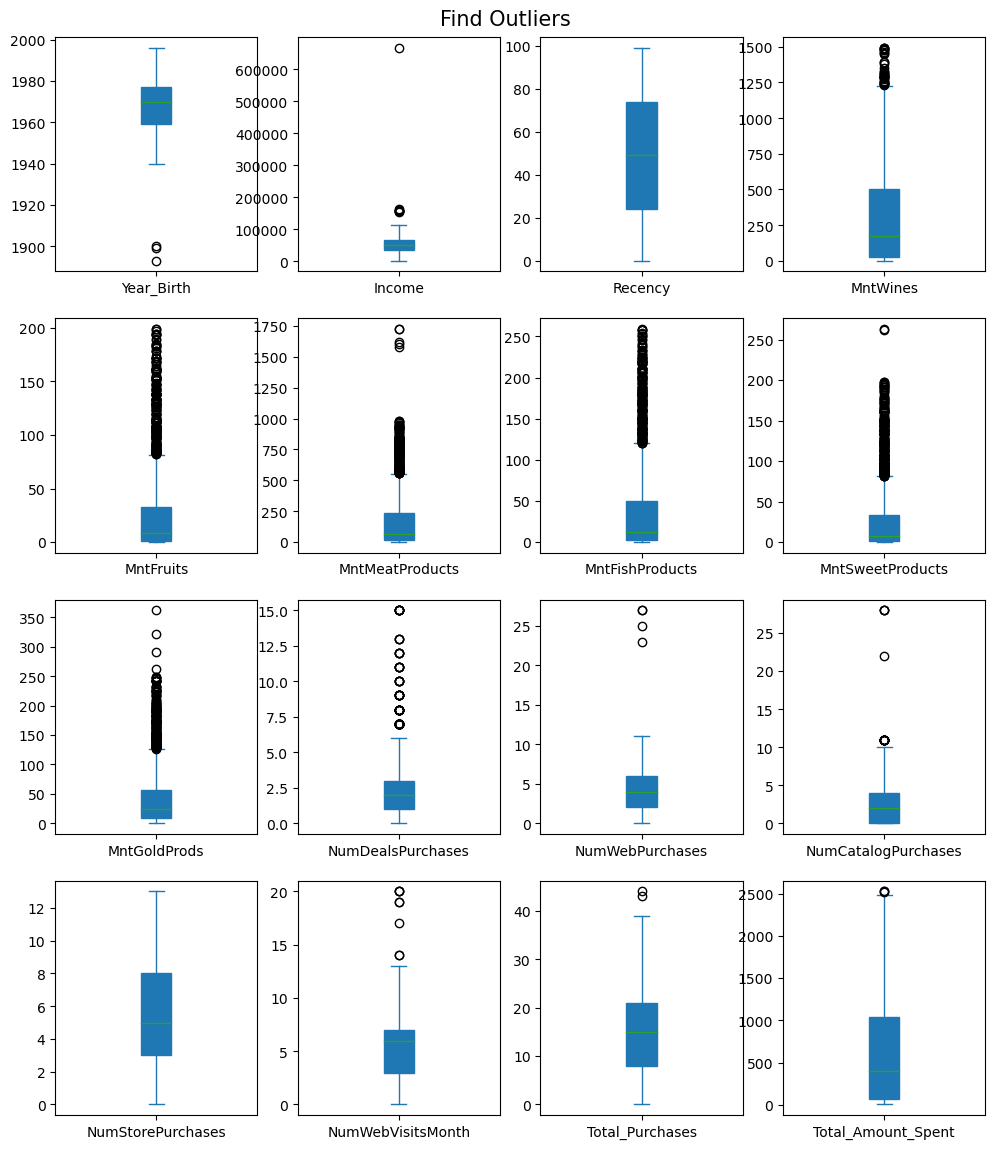

In [47]:
data_to_plot =  data.drop(columns=['Id', 'Education', 'Kidhome', 'Teenhome', 'Marital_Status', 'Dt_Customer', 'Response', 'Complain']).select_dtypes(include=np.number)
data_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

The outliers in Year_birth seems like entry errors since it's impossible that people who was born before 1900 still alive. Therefore, I will remove the outliers in Year_birth.

In [48]:
new_data = data[data['Year_Birth'] >= (data['Year_Birth'].mean()-3*data['Year_Birth'].std())]
data['Year_Birth'].describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

The outliers in Total Amount Spent and Income impacts on K-Means clustering so I need to remove it

In [49]:
Q1 = data['Total_Amount_Spent'].quantile(0.25)
Q3 = data['Total_Amount_Spent'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['Total_Amount_Spent'] < lower_bound) | (data['Total_Amount_Spent'] > upper_bound)]
outliers.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Purchases,Total_Amount_Spent
671,5735,1991,Master,Single,90638.0,0,0,2014,29,1156,...,96,1,3,4,10,1,0,0,18,2525
672,5350,1991,Master,Single,90638.0,0,0,2014,29,1156,...,96,1,3,4,10,1,1,0,18,2525
1404,1763,1988,Graduation,Together,87679.0,0,0,2013,62,1259,...,33,1,7,11,10,4,1,0,29,2524


In [50]:
Q1 = data['Income'].quantile(0.25)
Q3 = data['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['Income'] < lower_bound) | (data['Income'] > upper_bound)]
outliers.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Purchases,Total_Amount_Spent
325,4931,1977,Graduation,Together,157146.0,0,0,2013,13,1,...,1,0,0,28,0,1,0,0,28,1730
497,1501,1982,PhD,Married,160803.0,0,0,2012,21,55,...,4,15,0,28,1,0,0,0,44,1717
527,9432,1977,Graduation,Together,666666.0,1,0,2013,23,9,...,12,4,3,1,3,6,0,0,11,62
731,1503,1976,PhD,Together,162397.0,1,1,2013,31,85,...,2,0,0,0,1,1,0,0,1,107
853,5336,1971,Master,Together,157733.0,1,0,2013,37,39,...,8,0,1,0,1,1,0,0,2,59


In [51]:
data = data[(data['Income'] > lower_bound) & (data['Income'] < upper_bound)]
data.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Purchases,Total_Amount_Spent
count,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,...,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000
mean,5590.736559,1968.792563,51640.236126,0.444444,0.507168,49.111111,304.930108,26.380376,165.319444,37.644713,...,44.166219,2.318100,4.097670,2.636201,5.808244,5.331541,0.149642,0.009409,14.860215,605.596326
std,3246.390817,11.990340,20601.760369,0.538567,0.544680,28.952893,336.784950,39.821532,219.401447,54.689504,...,52.204505,1.894595,2.774726,2.795959,3.242198,2.415275,0.356800,0.096562,7.622844,601.444172
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,2828.250000,1959.000000,35434.750000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,8.000000,69.000000
50%,5458.500000,1970.000000,51566.000000,0.000000,0.000000,49.000000,176.000000,8.000000,67.000000,12.000000,...,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,15.000000,396.500000
75%,8421.750000,1977.000000,68118.000000,1.000000,1.000000,74.000000,505.000000,33.000000,231.250000,50.000000,...,56.250000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,21.000000,1044.250000
max,11191.000000,1996.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,43.000000,2525.000000


In [52]:
data = data[(data['Total_Amount_Spent'] > lower_bound) & (data['Total_Amount_Spent'] < upper_bound)]
data.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Purchases,Total_Amount_Spent
count,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,...,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000
mean,5590.736559,1968.792563,51640.236126,0.444444,0.507168,49.111111,304.930108,26.380376,165.319444,37.644713,...,44.166219,2.318100,4.097670,2.636201,5.808244,5.331541,0.149642,0.009409,14.860215,605.596326
std,3246.390817,11.990340,20601.760369,0.538567,0.544680,28.952893,336.784950,39.821532,219.401447,54.689504,...,52.204505,1.894595,2.774726,2.795959,3.242198,2.415275,0.356800,0.096562,7.622844,601.444172
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,2828.250000,1959.000000,35434.750000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,8.000000,69.000000
50%,5458.500000,1970.000000,51566.000000,0.000000,0.000000,49.000000,176.000000,8.000000,67.000000,12.000000,...,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,15.000000,396.500000
75%,8421.750000,1977.000000,68118.000000,1.000000,1.000000,74.000000,505.000000,33.000000,231.250000,50.000000,...,56.250000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,21.000000,1044.250000
max,11191.000000,1996.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,43.000000,2525.000000


**Identify Patterns or Anomalies**

Use a heatmap to see the correlations between each variable. When it gets redder, they are more positively correlated, and when it gets bluer, they are more negatively correlated.

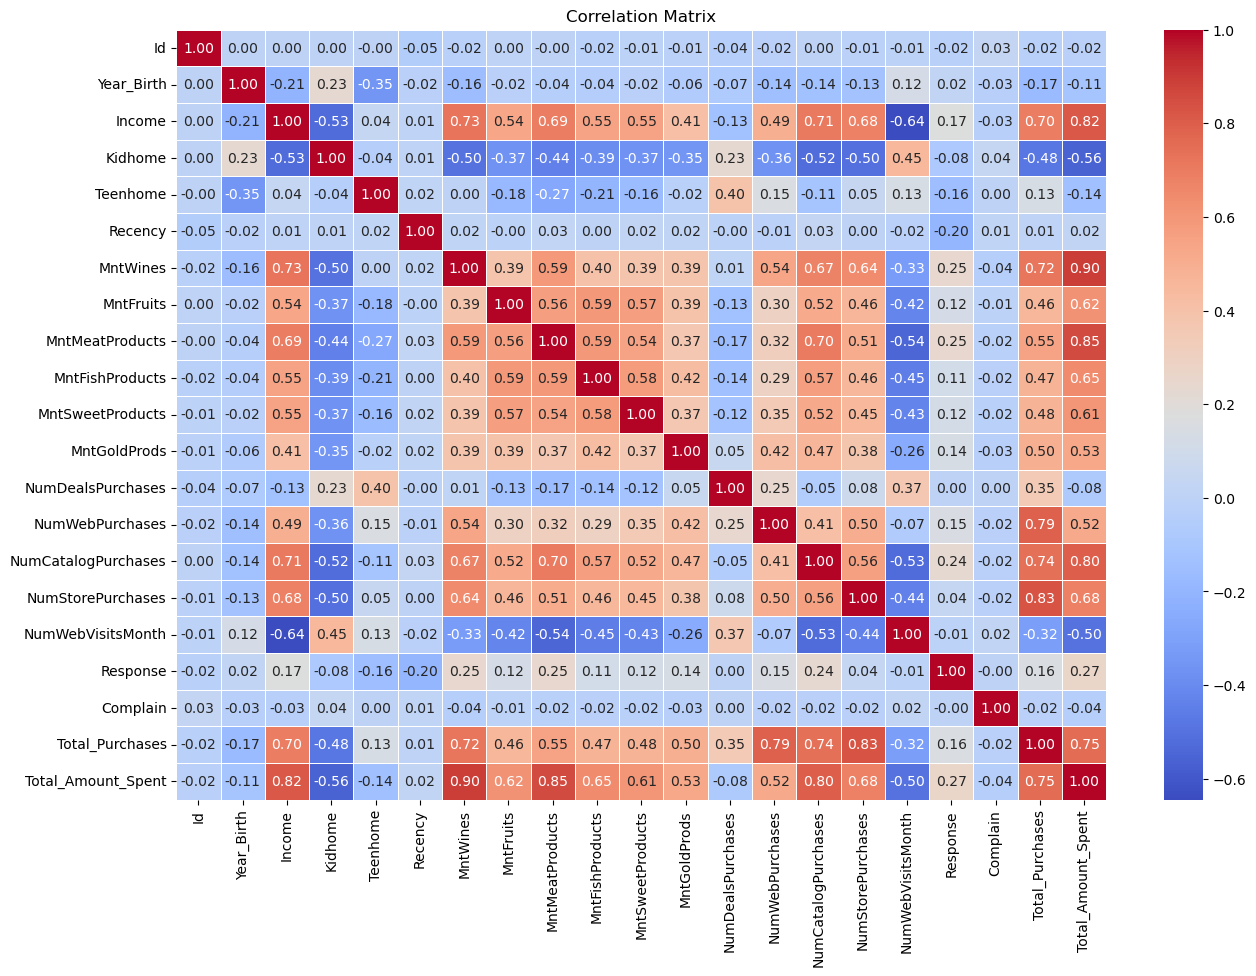

In [53]:
correlation_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Patterns**

High Income People
- tend to spend more and purchase more.
- tend to visit the company's website less frequently than other people.
- tend to has few number of purchases made with a discount

People having kids at home
- tend to spend less and purchase less.
- tend to visit the company's website most frequently than other people
- tend to has high number of purchases made with a discount

**Anomalies**

The number of complaints in the last two years has almost no correlation with the total amount spent in the last two years => After further investigating the data, I found that it is because we only have 21 customers who complained in the last two years, but we have 2240 customers in total. The customer service in the company has done a wonderful job in the last two years.

<AxesSubplot:xlabel='Complain', ylabel='Total_Amount_Spent'>

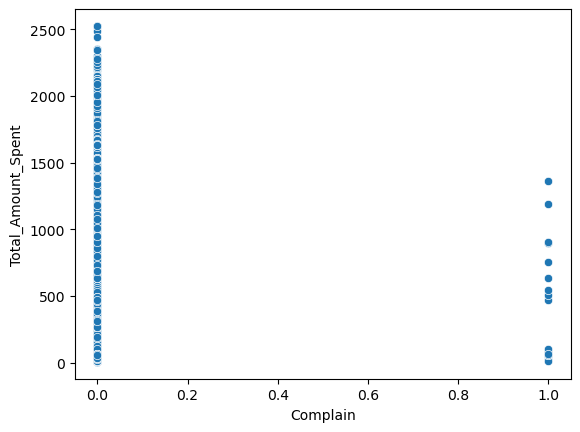

In [54]:
sns.scatterplot(x="Complain", y="Total_Amount_Spent", data=data)

In [55]:
import statsmodels.api as sm
from scipy.stats import pearsonr

r, p_value  =  pearsonr(x=data['Complain'], y=data['Total_Amount_Spent'])

# print results
print('Pearson correlation (r): ', r)
print('Pearson p-value: ', p_value)

Pearson correlation (r):  -0.03714246943718898
Pearson p-value:  0.07936491333673967


There is a weak negative correlation between the two variables. The correlation results were not statistically significant.


In [56]:
data['Complain'].sum()

21

**Task 3: K-Means Clustering**

K-means clustering is an unsupervised machine learning algorithm used to cluster data based on similarity.

- Standardising data
- Principal Component Analysis (PCA)
- Elbow method
- Silhouette score analysis

In [57]:
from sklearn.cluster import KMeans

Standardising data

K-means clustering algorithm is based on the calculation of distances between data points to form clusters. When features have different scales, features with larger scales can disproportionately influence the distance calculation. There are various ways to standardise features, we will use **standard scaling**.

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_for_clustering = ['Income', 'Total_Amount_Spent', 'In_Relationship']
data_scaled = data.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(data[cols_for_clustering])
data_scaled[cols_for_clustering].describe()

,Income,Total_Amount_Spent,In_Relationship
count,2.232000e+03,2.232000e+03,2.232000e+03
mean,2.415431e-16,2.183638e-17,-1.270390e-16
std,1.000224e+00,1.000224e+00,1.000224e+00
min,-2.423163e+00,-9.988141e-01,-1.344451e+00
25%,-7.867831e-01,-8.923797e-01,-1.344451e+00
50%,-3.604195e-03,-3.477350e-01,7.437983e-01
75%,8.000023e-01,7.294974e-01,7.437983e-01
max,3.014678e+00,3.192040e+00,7.437983e-01


Principal Component Analysis (PCA)

In [63]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(data_scaled[cols_for_clustering])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]
data_scaled.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Purchases,Total_Amount_Spent,In_Relationship,pc1,pc2
0,1826,1970,Graduation,Divorced,1.611620,0,0,2014,0,189,...,4,6,1,1,0,15,0.971885,-1.344451,1.861643,1.292842
1,1,1961,Graduation,Single,0.264637,0,0,2014,0,464,...,3,7,5,1,0,18,-0.047557,-1.344451,0.188931,1.338500
2,10476,1958,Graduation,Married,0.758686,0,1,2014,0,134,...,2,5,2,0,0,11,-0.589707,0.743798,0.099723,-0.752729
3,1386,1967,Graduation,Together,-0.930529,1,1,2014,0,10,...,0,2,7,0,0,4,-0.988836,0.743798,-1.376368,-0.707945
4,5371,1989,Graduation,Single,-1.464583,1,0,2014,0,6,...,1,2,7,1,0,8,-0.855793,-1.344451,-1.604642,1.390015


Elbow method

In [64]:
X = data_scaled[cols_for_clustering]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters=K).fit(X).inertia_
    inertia_list.append(inertia)

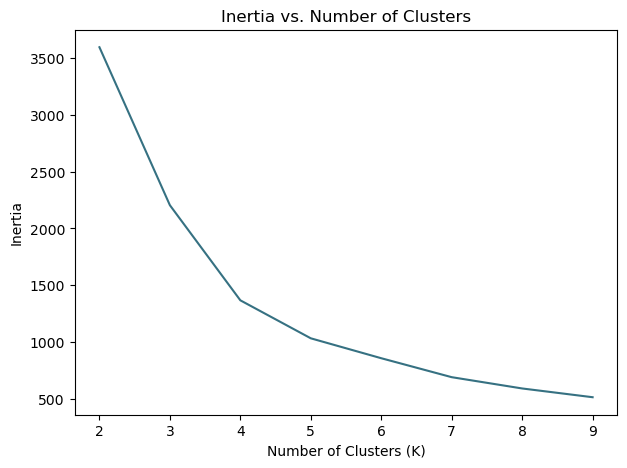

In [65]:
plt.figure(figsize=[7,5])
plt.plot(range(2,10), inertia_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

Elbow method suggests 4 or 5 clusters. Let's check silhouette score.

Silhouette score analysis

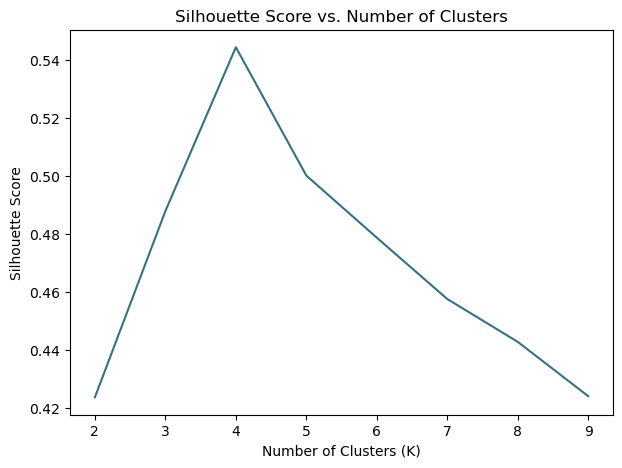

In [66]:
from sklearn.metrics import silhouette_score
silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, random_state=7)
    clusters = model.fit_predict(X)
    s_avg = silhouette_score(X, clusters)
    silhouette_list.append(s_avg)

plt.figure(figsize=[7,5])
plt.plot(range(2,10), silhouette_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

The Elbow Method and Silhouette Analysis suggested 4 clusters (k=4). The elbow method highlighted the number of 4 or 5 clusters as a reasonable number of clusters. The silhouette score analysis revealed a peak silhouette score for k=4.

In [67]:
model = KMeans(n_clusters=4, random_state = 7)
model.fit(data_scaled[cols_for_clustering])
data_scaled['Cluster'] = model.predict(data_scaled[cols_for_clustering])

**Task 4: Insights and Customer Segmentation**

Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.

- Visualisation of clusters
- Mean consumption of different product types by cluster
- Cluster sizes
- Income by cluster
- In_relationship feature by cluster

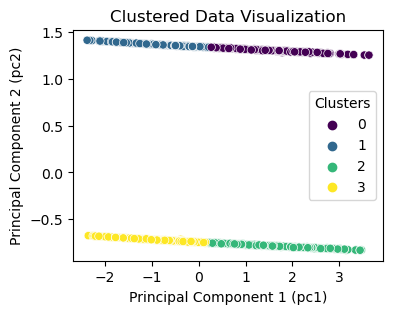

In [68]:
plt.figure(figsize=(4, 3))
sns.scatterplot(x='pc1', y='pc2', data=data_scaled, hue='Cluster', palette='viridis')
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')
plt.legend(title='Clusters')

In [69]:
data['Cluster'] = data_scaled.Cluster
data.groupby('Cluster')[cols_for_clustering].mean()

,Income,Total_Amount_Spent,In_Relationship
Cluster,,,
0,71973.368984,1241.551205,0.0
1,37614.041060,175.958963,0.0
2,71247.903137,1204.749577,1.0
3,37639.523363,172.600473,1.0


Mean consumption of different product types by cluster

In [70]:
cols_mnt = ['Total_Amount_Spent', 'MntWines',	'MntFruits', 'MntMeatProducts',	'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
mnt_data = data.groupby('Cluster')[cols_mnt].mean().reset_index()
mnt_data.head()

,Cluster,Total_Amount_Spent,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,1241.551205,616.578313,55.162651,360.963855,77.858434,56.078313,74.909639
1,1,175.958963,85.099352,7.913607,38.440605,10.848812,8.166307,25.490281
2,2,1204.749577,614.280880,52.257191,337.307953,74.162437,54.064298,72.676819
3,3,172.600473,86.830969,7.114657,37.832151,11.017730,7.399527,22.405437


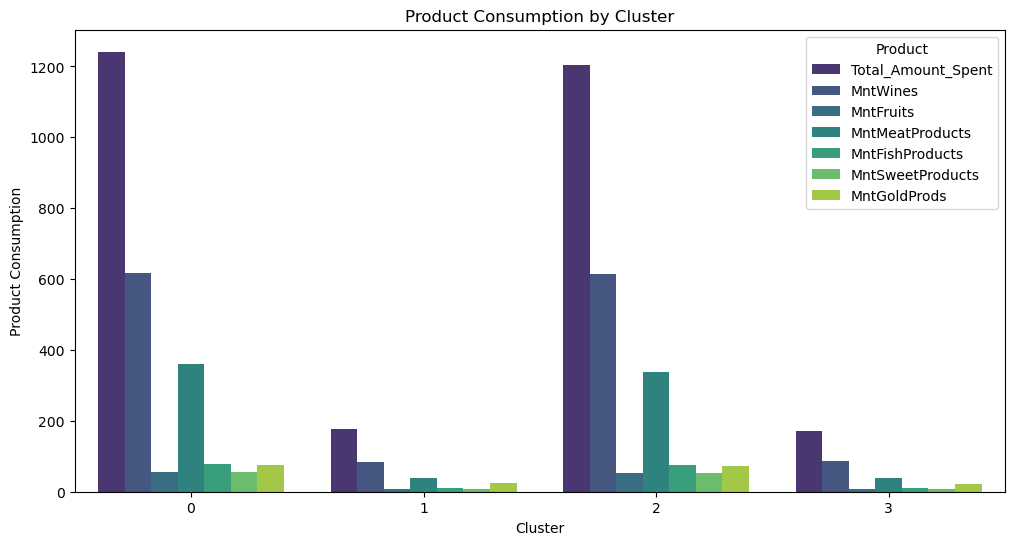

In [71]:
melted_data = pd.melt(mnt_data, id_vars="Cluster", var_name="Product", value_name="Consumption")
plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None, palette="viridis")
plt.title("Product Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Consumption")
plt.xticks(rotation=0)  
plt.legend(title="Product", loc="upper right")
plt.show()

Cluster sizes

Text(0, 0.5, 'Total_Amount_Spent')

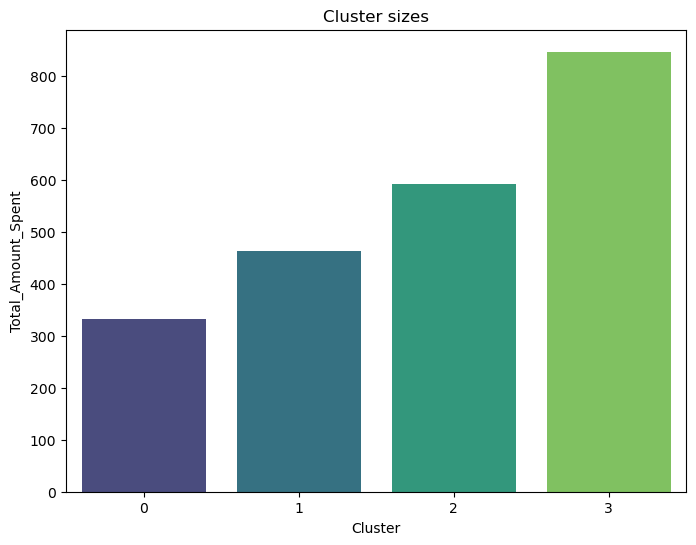

In [73]:
cluster_sizes = data.groupby('Cluster')[['Total_Amount_Spent']].count().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Cluster', y='Total_Amount_Spent', data=cluster_sizes, palette = 'viridis')
plt.title('Cluster sizes')
plt.xlabel('Cluster')
plt.ylabel('Total_Amount_Spent')

In [74]:
total_rows = len(data)
cluster_sizes['Share%'] = round(cluster_sizes['Total_Amount_Spent'] / total_rows*100,0)
cluster_sizes.head()

,Cluster,Total_Amount_Spent,Share%
0,0,332,15.0
1,1,463,21.0
2,2,591,26.0
3,3,846,38.0


Income by cluster

Box plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


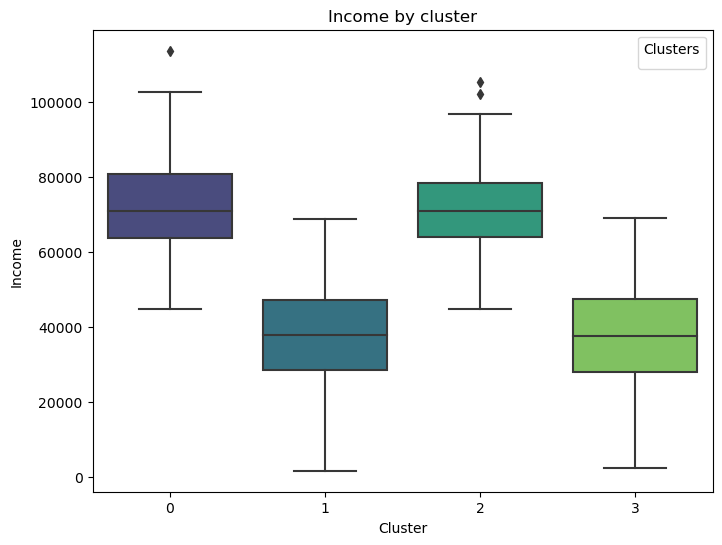

In [75]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Income', data=data, palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.legend(title='Clusters')

Scatter plot

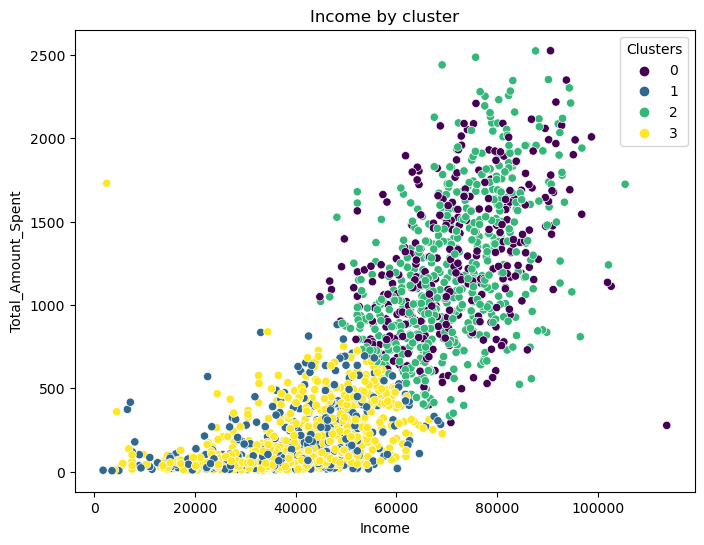

In [76]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Total_Amount_Spent', data=data, hue = 'Cluster', palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Income')
plt.ylabel('Total_Amount_Spent')
plt.legend(title='Clusters')

In_relationship feature by cluster

Text(0, 0.5, 'In_Relationship')

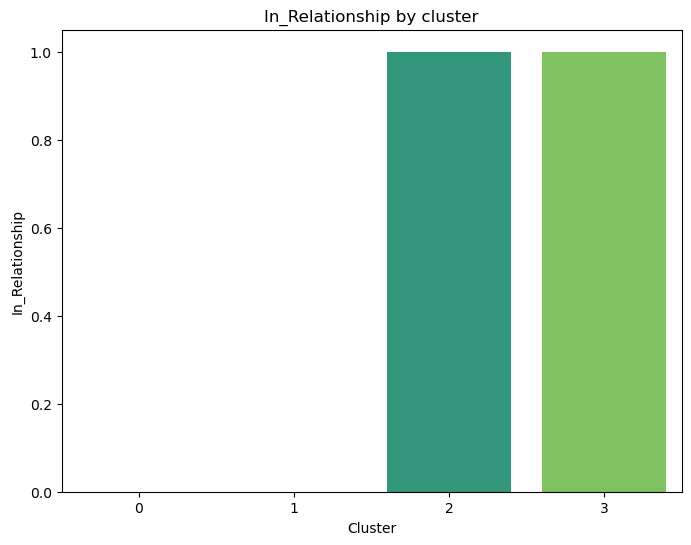

In [77]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='In_Relationship', data=data, palette='viridis')
plt.title('In_Relationship by cluster')
plt.xlabel('Cluster')
plt.ylabel('In_Relationship')

**Task 5: Conclusion and Recommendations**

This section contains the results of the K-means clustering analysis, which aimed to identify distinct customer segments based on the total amount of purchases they made (Total_Amount_Spent). The analysis utilised 'Income' and 'In_Relationship' features.

**Cluster Characteristics**

Cluster 0: High Income single customers
This cluster are customers have high income and they are single, they account for 15% of the customer base

Cluster 1: Low Income single customers
These customers have low income and they are single and account for  21% of the customer base

Cluster 2: High Income customers in relationship (either married or together)
These customers have high income and they are in a relationship, and they account for 26% of the customer base

Cluster 3: Low Income customers in relationship
These customers have low income and they are in a relationship and represent 38% of the customer base


**Recommendations**

Based on the clusters, tailored marketing strategies can be created. Customers from these segments will have different interests and product preferences.

**Marketing Strategies for Each Cluster**

Cluster 0: High value single customers
- These customers buy a lot of wines and fruits.
- This cluster contains single customers. Promo images with friends, parties or single trips may be more efficient for single customers

Cluster 1: Low value single customers
- Promos with discounts and coupons may bring good results for this targeted group.
- Loyalty program may stimulate these customers to purchase more often.

Cluster 2: High value customers in relationship (either married or together)
- Preliminary analysis showed that high income customers buy more wines and fruits.
- A tailored campaign to promote high quality wines may bring good results.
- This cluster contains customers in relationship, family-oriented promo-images should be quite effective for this audience.

Cluster 3: Low value customers in relationship
- This cluster has the highest percentage of our customers (39%).
- Family offers and discounts may influence these customers to make more purchases